## **✅문제 2번 실행 코드 (초기 설정 & 계산)**

In [2]:
import numpy as np

# 1.데이터 및 초기 파라미터 설정

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]]) # 입력 데이터

# 정답 레이블 (-1 또는 1)
answer = np.array([-1, 1, 1, 1])
training = ['a', 'b', 'c', 'd']

# 초기값
W = np.array([-0.68, -0.75])
b = 0.6
lr = 0.2

# 2.퍼셉트론 학습

max_iter = 100   # 무한 루프 방지
update_cnt = 0   # 학습횟수 카운팅 변수
history = []     # 그래프를 위한 리스트
print(f"학습 시작 초기값: w(0)=({W[0]}, {W[1]}), b(0)={b}, 학습률(lr)={lr}")
print("=" * 50)
history.append({'epoch': 0, 'cnt': 0, 'w': W.copy(), 'b': b, 'final': False}) # 학습 전 초기상태 출력

# 직선의 방정식 부호 출력
w2_s = "-" if W[1] < 0 else "+"
b_s = "-" if b < 0 else "+"
init_expr = f"{W[0]:.2f}x₁ {w2_s} {abs(W[1]):.2f}x₂ {b_s} {abs(b):.2f}" # 수식 문자열 생성

print("[초기상태](학습전)")
print(f"  d(x) = {init_expr}")
print(f"  직선의 방정식: {init_expr} = 0")

# 절편(분모가 0이 아닐때만 나눗셈 수행)
y_int = -b/W[1] if W[1]!=0 else None
x_int = -b/W[0] if W[0]!=0 else None
int_msgs = []
if x_int is not None: int_msgs.append(f"x절편: {x_int:.2f}")
if y_int is not None: int_msgs.append(f"y절편: {y_int:.2f}")
int_str = ", ".join(int_msgs) if int_msgs else "절편 없음"
print(f"  {int_str}")

# 학습전 초기 오분류 확인
Y_init = []
for i in range(len(X)):
    # 판별식 d(x) = w*x + b 계산
    # 결과가 0 이상이면 +1 예측, 미만이면 -1 예측
    prediction = 1 if np.dot(W, X[i]) + b >= 0 else -1

    # 예측값과 정답이 다르면 오분류 리스트에 추가
    if prediction != answer[i]:
        Y_init.append(i)

# 오분류된 데이터 집합 출력
mis_names = [training[i] for i in Y_init]
y_str = "{" + ", ".join(mis_names) + "}" if mis_names else "∅"
print(f"  Y(오분류 집합) = {y_str}")
print("-" * 50)


# 실제 학습 반복문 (Epoch 1 ~ Max)

for k in range(1, max_iter + 1):
    Y_indices = [] # 틀린 데이터를 담을 리스트

    # 모든 데이터 샘플에 대해 검사 수행
    for i in range(len(X)):
        # 판별식 계산: d(x) = w1*x1 + w2*x2 + b
        d_val = np.dot(W, X[i]) + b
        # 활성 함수(계단 함수)
        y_pred = 1 if d_val >= 0 else -1
        # 정답과 비교하여 틀릴 시 Y에 추가
        if y_pred != answer[i]:
            Y_indices.append(i)

    # 상황 출력
    # 수식 출력을 위한 부호 및 문자열 포맷팅
    w2_sign = "-" if W[1] < 0 else "+"
    b_sign = "-" if b < 0 else "+"

    # d(x)
    expr_str = f"{W[0]:.2f}x₁ {w2_sign} {abs(W[1]):.2f}x₂ {b_sign} {abs(b):.2f}"

    #절편
    x_int = -b/W[0] if W[0]!=0 else None
    y_int = -b/W[1] if W[1]!=0 else None
    int_msgs = []
    if x_int is not None: int_msgs.append(f"x절편: {x_int:.2f}")
    if y_int is not None: int_msgs.append(f"y절편: {y_int:.2f}")
    int_str = ", ".join(int_msgs) if int_msgs else "절편 없음"

    #Y
    mis_names = [training[i] for i in Y_indices]
    y_str = "{" + ", ".join(mis_names) + "}" if mis_names else "∅"


    print(f"[Epoch {k}]")
    print(f"  d(x) = {expr_str}")
    print(f"  직선의 방정식: {expr_str} = 0")
    print(f"  {int_str}")
    print(f"  Y(오분류 집합) = {y_str}")

    # 오분류된 데이터가 하나도 없으면(Y가 비었으면) 학습 종료
    if not Y_indices:
        print("=" * 50)
        print(f"모든 데이터 정답 분류 완료 (총 {update_cnt}회 학습)")
        # 최종 상태(수렴된 상태)를 history에 저장
        history.append({'epoch': k, 'cnt': update_cnt, 'w': W.copy(), 'b': b, 'final': True})
        break
    # 아직 학습 중이라면 현재 상태를 history에 저장
    history.append({'epoch': k, 'cnt': update_cnt, 'w': W.copy(), 'b': b, 'final': False})

    #업데이트 계산 (Weight Update)

    # 오분류된 모든 샘플의 오차를 합산(Sigma)
    sum_tx = np.zeros(2) # 가중치용 합계 (t * x)
    sum_t = 0            # 편향용 합계 (t)

    for idx in Y_indices:
        sum_tx += answer[idx] * X[idx]
        sum_t += answer[idx]
    print()

    #가중치 업데이트 수식 & 표시
    w_next = W + lr * sum_tx
    b_next = b + lr * sum_t
    print(f"  w({update_cnt+1}) = w({update_cnt}) + lr * Σtx")
    print(f"         = ({W[0]:.2f}, {W[1]:.2f}) + {lr}×({sum_tx[0]:.0f}, {sum_tx[1]:.0f}) = ({w_next[0]:.2f}, {w_next[1]:.2f})")
    print(f"  b({update_cnt+1}) = b({update_cnt}) + lr * Σt")
    print(f"         = {b:.2f} + {lr}×({sum_t}) = {b_next:.2f}")

    # 실제 변수 업데이트 적용
    W = w_next
    b = b_next
    update_cnt += 1 # 학습 횟수 1 증가

    print(f"  -> 학습 {update_cnt}회 실행 완료!!!")
    print("-" * 50)

학습 시작 초기값: w(0)=(-0.68, -0.75), b(0)=0.6, 학습률(lr)=0.2
[초기상태](학습전)
  d(x) = -0.68x₁ - 0.75x₂ + 0.60
  직선의 방정식: -0.68x₁ - 0.75x₂ + 0.60 = 0
  x절편: 0.88, y절편: 0.80
  Y(오분류 집합) = {a, b, c, d}
--------------------------------------------------
[Epoch 1]
  d(x) = -0.68x₁ - 0.75x₂ + 0.60
  직선의 방정식: -0.68x₁ - 0.75x₂ + 0.60 = 0
  x절편: 0.88, y절편: 0.80
  Y(오분류 집합) = {a, b, c, d}

  w(1) = w(0) + lr * Σtx
         = (-0.68, -0.75) + 0.2×(2, 2) = (-0.28, -0.35)
  b(1) = b(0) + lr * Σt
         = 0.60 + 0.2×(2) = 1.00
  -> 학습 1회 실행 완료!!!
--------------------------------------------------
[Epoch 2]
  d(x) = -0.28x₁ - 0.35x₂ + 1.00
  직선의 방정식: -0.28x₁ - 0.35x₂ + 1.00 = 0
  x절편: 3.57, y절편: 2.86
  Y(오분류 집합) = {a}

  w(2) = w(1) + lr * Σtx
         = (-0.28, -0.35) + 0.2×(0, 0) = (-0.28, -0.35)
  b(2) = b(1) + lr * Σt
         = 1.00 + 0.2×(-1) = 0.80
  -> 학습 2회 실행 완료!!!
--------------------------------------------------
[Epoch 3]
  d(x) = -0.28x₁ - 0.35x₂ + 0.80
  직선의 방정식: -0.28x₁ - 0.35x₂ + 0.80 = 0
  x

## **그래프 시각화(단계별 & 통합)**

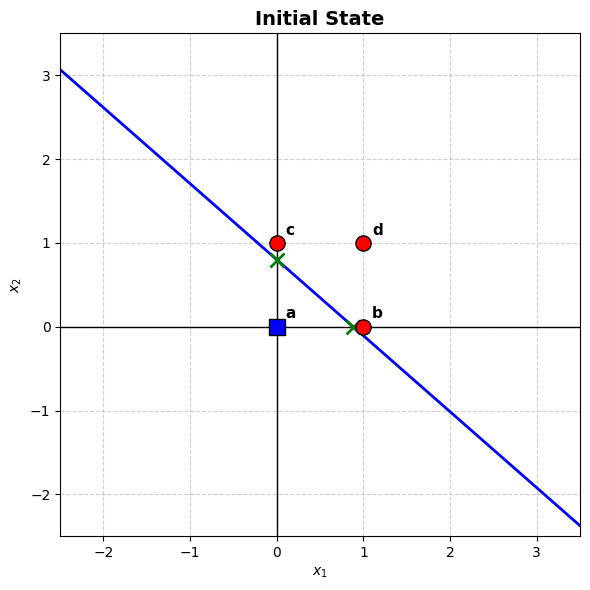

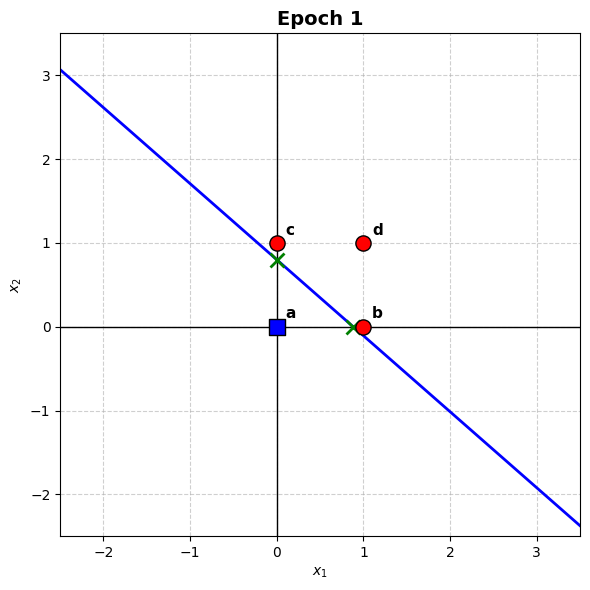

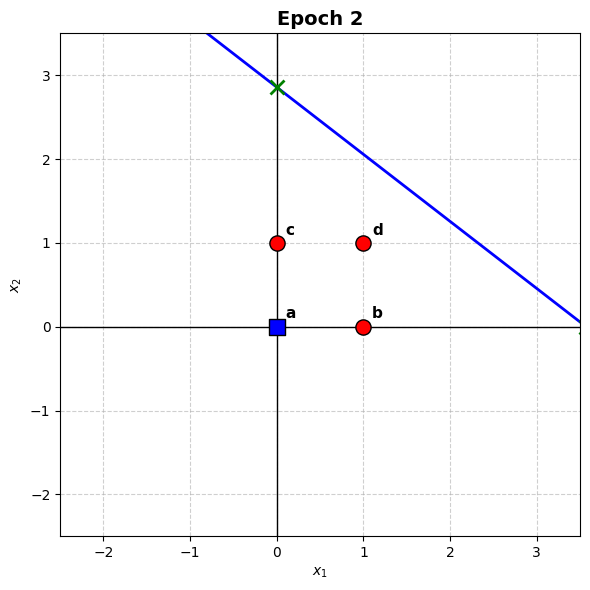

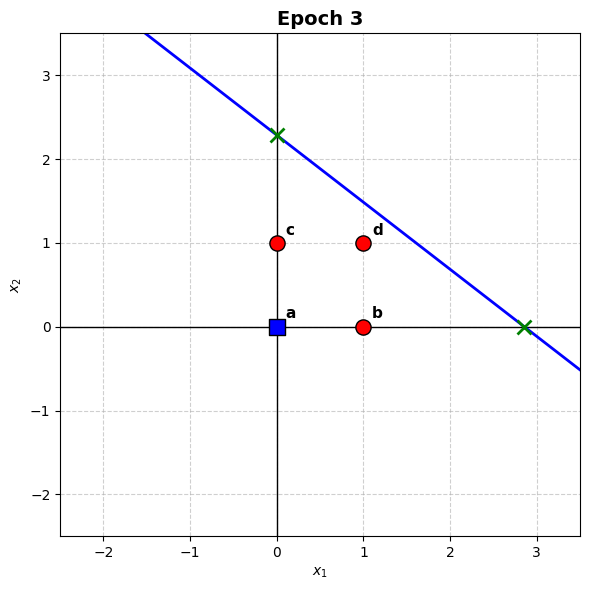

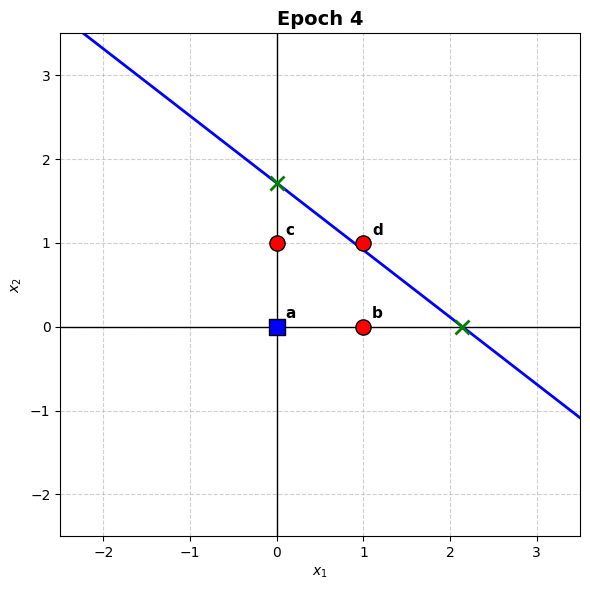

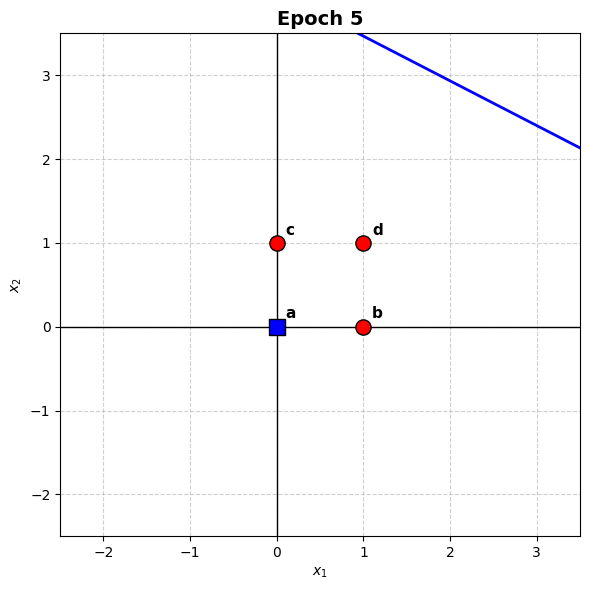

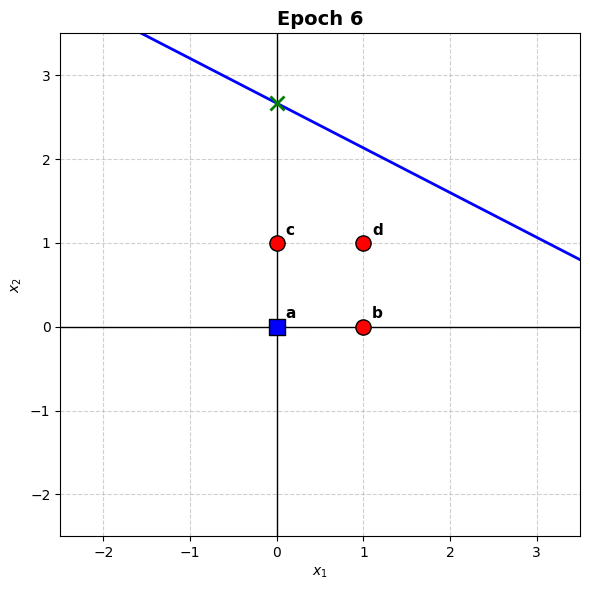

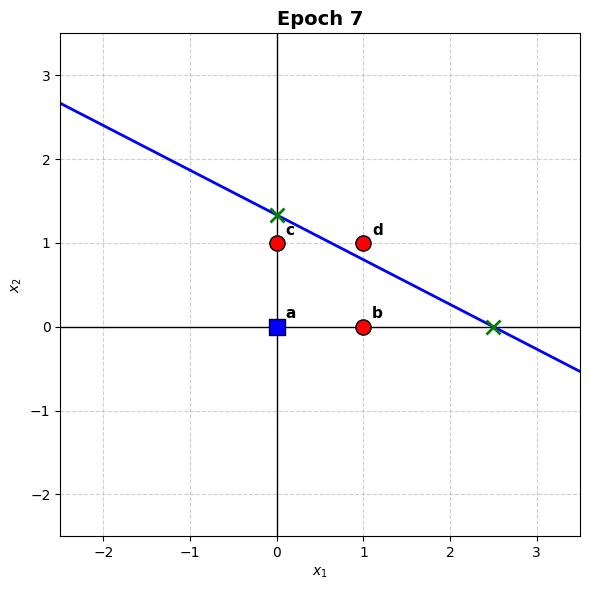

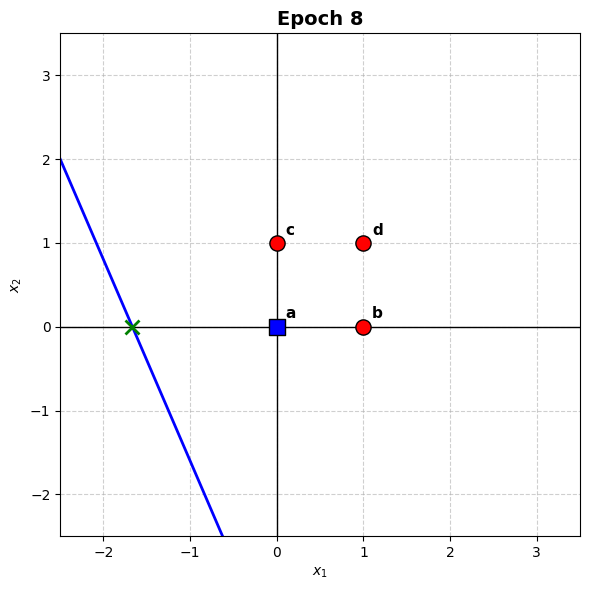

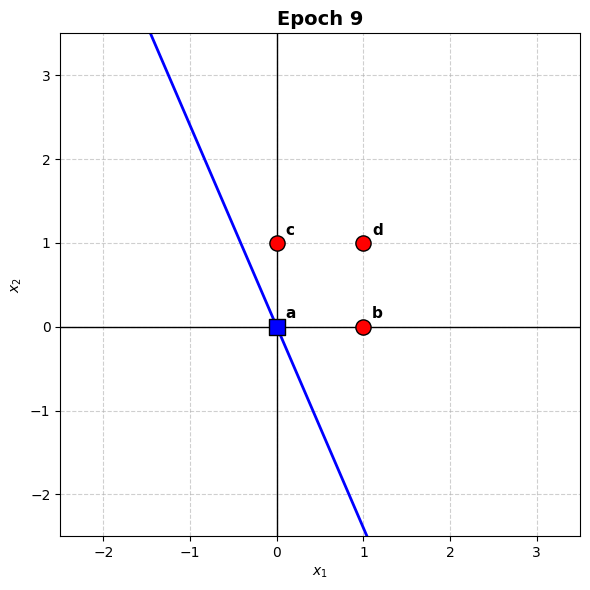

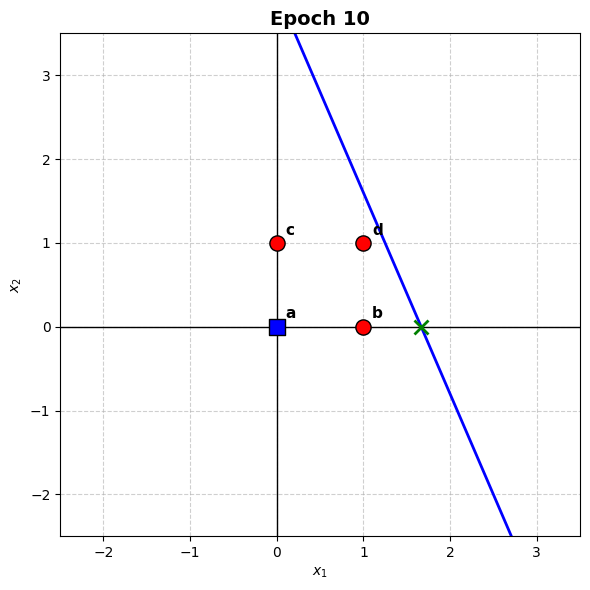

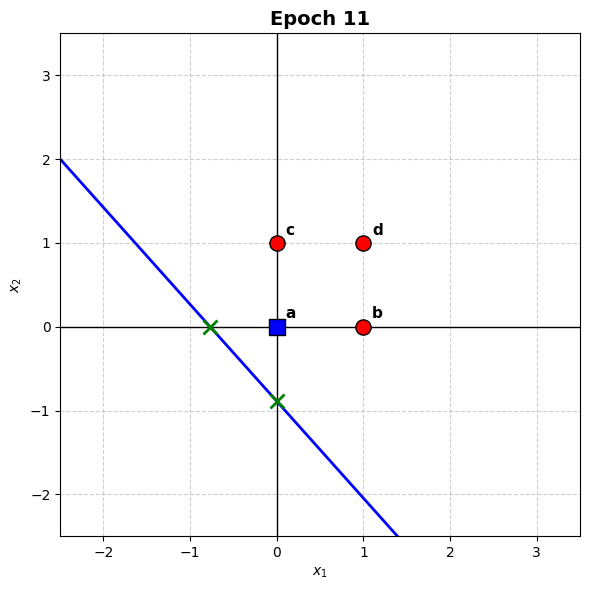

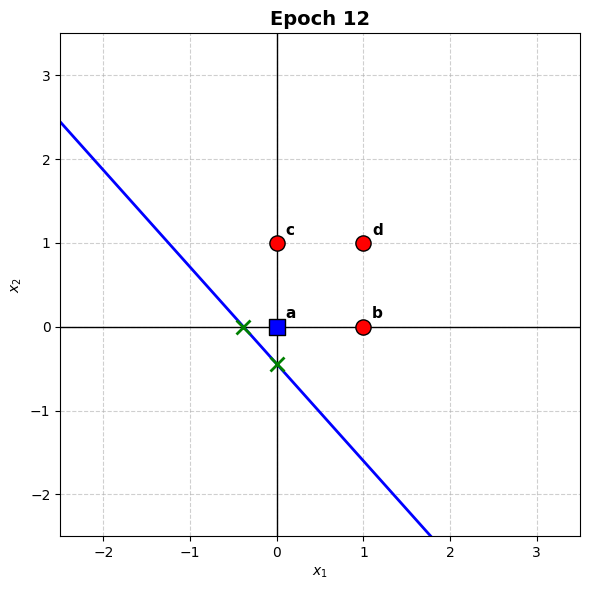

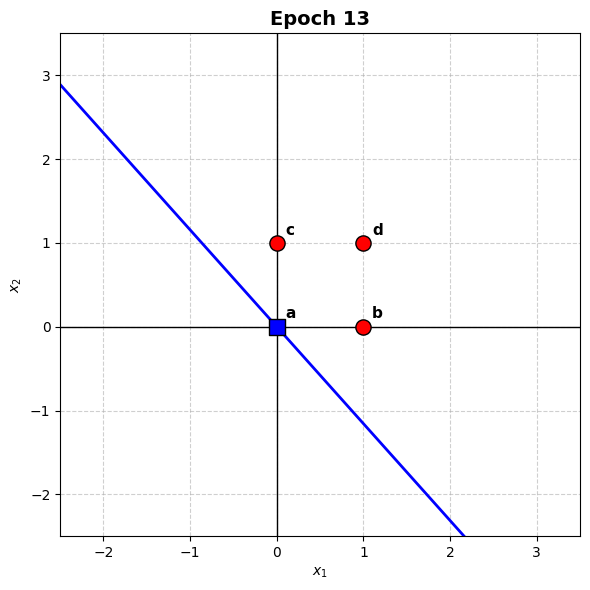

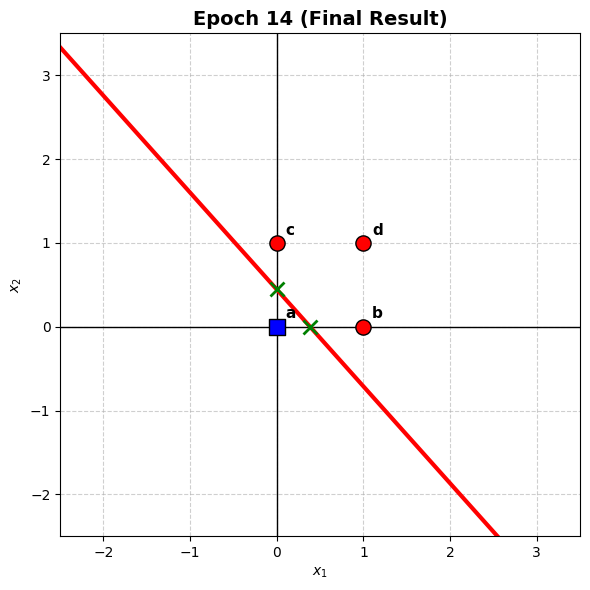

In [5]:
import matplotlib.pyplot as plt

# 그래프 함수 정의
def plot_history_step(state):
    w = state['w']
    b = state['b']
    epoch = state['epoch']
    is_final = state['final']
    plt.figure(figsize=(6, 6))

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(-2.5, 3.5)
    plt.ylim(-2.5, 3.5)

    title_str = f"Epoch {epoch}" #제목
    if is_final: title_str += " (Final Result)"
    elif epoch == 0: title_str = "Initial State"

    plt.title(title_str, fontsize=14, fontweight='bold')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    for i in range(len(X)):
        marker = 's' if answer[i] == -1 else 'o'
        color = 'blue' if answer[i] == -1 else 'red'
        plt.scatter(X[i, 0], X[i, 1], marker=marker, c=color, s=120, edgecolors='k', zorder=10)
        plt.text(X[i, 0]+0.1, X[i, 1]+0.1, training[i], fontsize=11, fontweight='bold')

    # 직선 그리기
    x_range = np.linspace(-3, 4, 100)
    if w[1] != 0:
        y_range = -(w[0] * x_range + b) / w[1]

        line_color = 'red' if is_final else 'blue'
        line_width = 3 if is_final else 2
        plt.plot(x_range, y_range, color=line_color, linewidth=line_width)

        # 절편(녹색)
        y_int = -b / w[1]
        plt.plot(0, y_int, marker='x', color='green', markersize=10, markeredgewidth=2)
        if w[0] != 0:
            x_int = -b / w[0]
            plt.plot(x_int, 0, marker='x', color='green', markersize=10, markeredgewidth=2)

    plt.tight_layout()
    plt.show()

for state in history:
    plot_history_step(state)

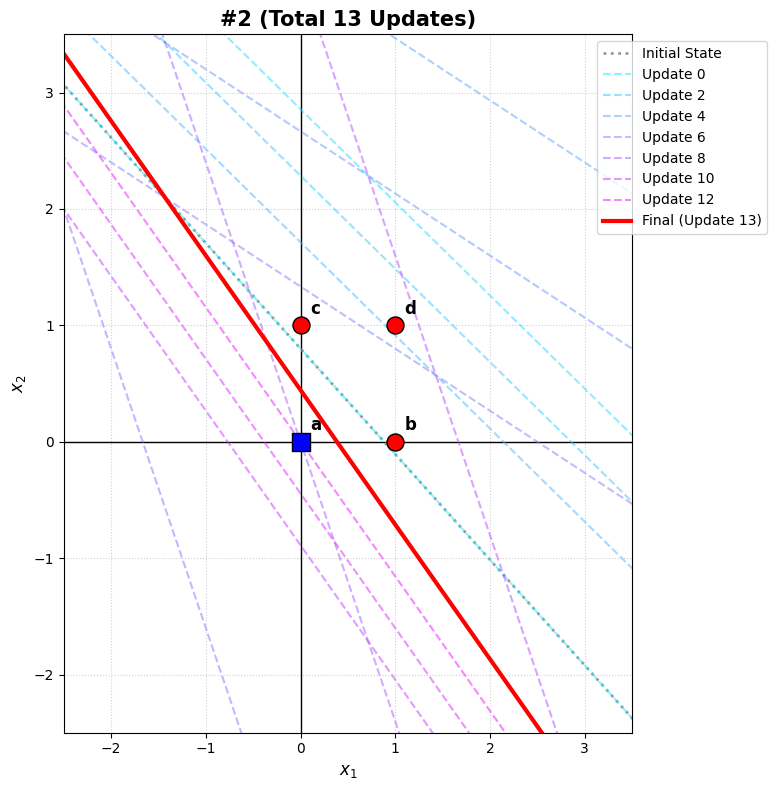

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 전체 학습 과정 통합 그래프
def plot_all_in_one(history):
    plt.figure(figsize=(8, 8))

    # 제목 및 축 설정
    total_updates = history[-1]['cnt']
    plt.title(f"#2 (Total {total_updates} Updates)", fontsize=15, fontweight='bold')
    plt.xlabel("$x_1$", fontsize=12)
    plt.ylabel("$x_2$", fontsize=12)

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True, linestyle=':', alpha=0.6)

    #범위
    plt.xlim(-2.5, 3.5)
    plt.ylim(-2.5, 3.5)

    for i in range(len(X)):
        marker = 's' if answer[i] == -1 else 'o'
        color = 'blue' if answer[i] == -1 else 'red'
        plt.scatter(X[i, 0], X[i, 1], marker=marker, c=color, s=150, edgecolors='k', zorder=10)
        plt.text(X[i, 0]+0.1, X[i, 1]+0.1, training[i], fontsize=12, fontweight='bold')

    x_range = np.linspace(-3, 4, 100)

    # 색상 맵 생성
    # history 개수만큼 색상을 생성
    colors = plt.cm.cool(np.linspace(0, 1, len(history)))

    for idx, state in enumerate(history):
        w = state['w']
        b_val = state['b']
        epoch = state['epoch']
        cnt = state['cnt']

        if w[1] != 0:
            y_range = -(w[0] * x_range + b_val) / w[1]

            # 스타일 설정
            if idx == 0:
                label = "Initial State"
                color = 'gray'
                style = ':'
                width = 2
                alpha = 0.8
            elif idx == len(history) - 1: # 최종 상태
                label = f"Final (Update {cnt})"
                color = 'red'
                style = '-'
                width = 3
                alpha = 1.0
            else: # 중간 과정
                # 짝수번째만 표기(너무 많음 방지)
                label = f"Update {cnt}" if cnt % 2 == 0 else "_nolegend_"
                color = colors[idx]
                style = '--'
                width = 1.5
                alpha = 0.5

            plt.plot(x_range, y_range, color=color, linestyle=style, linewidth=width, label=label, alpha=alpha)

    # 범례 표시
    plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    plt.show()

plot_all_in_one(history)

## **✅1번 문제**

문제 1 학습 시작 w(0)=[0.0, -1.0], b(0)=0.5, ρ=0.4
[Epoch 0] Initial State


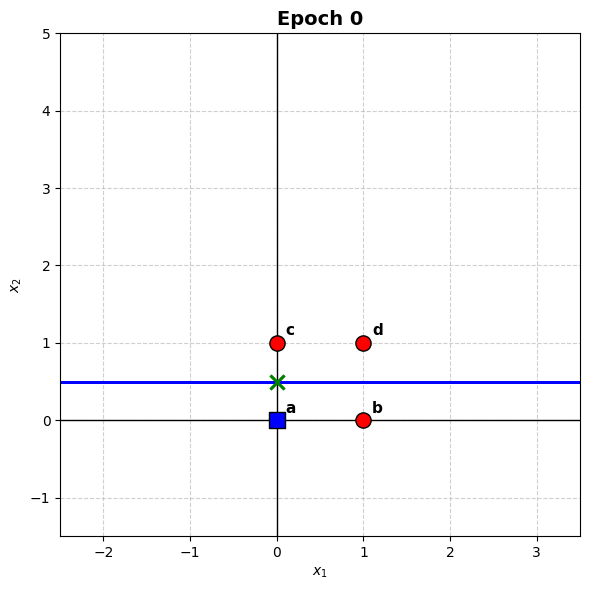

[Epoch 1] Update 0 완료 후 상태


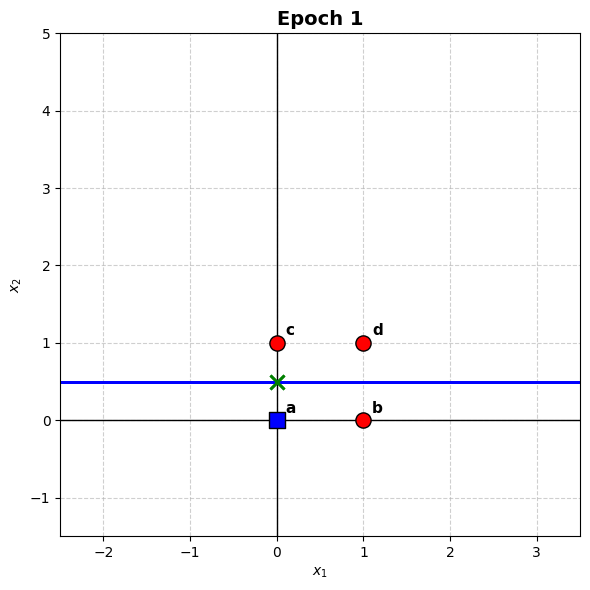

[Epoch 2] Update 1 완료 후 상태


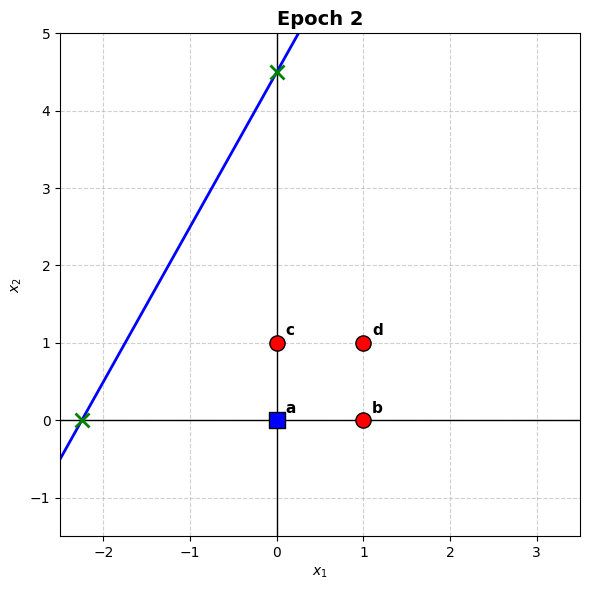

[Epoch 3] Update 2 완료 후 상태


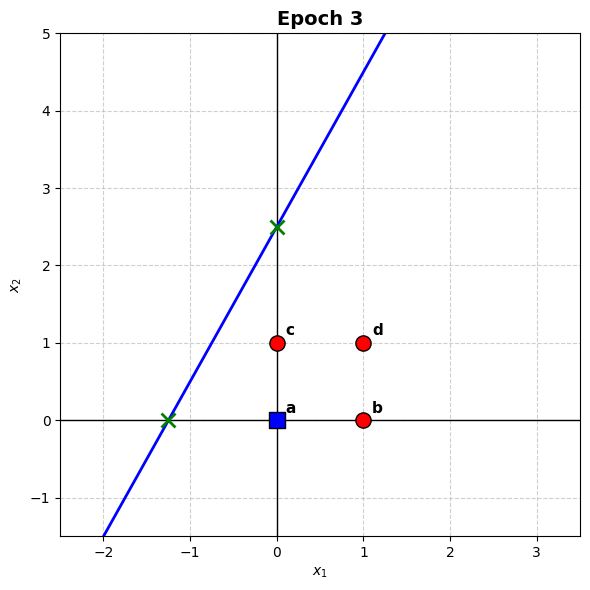

[Epoch 4] Update 3 완료 후 상태


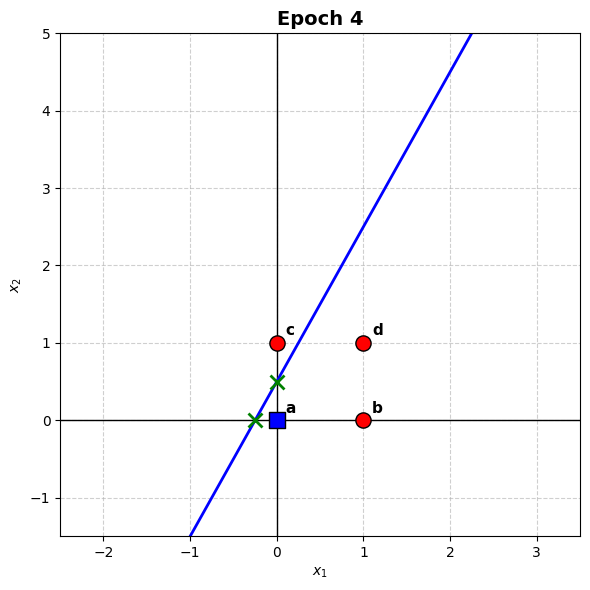

[Epoch 5] Update 4 완료 후 상태


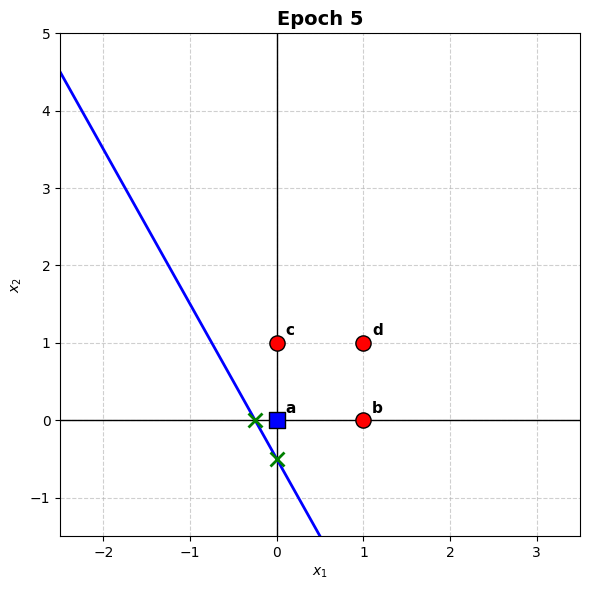

[Epoch 6] Update 5 완료 후 상태


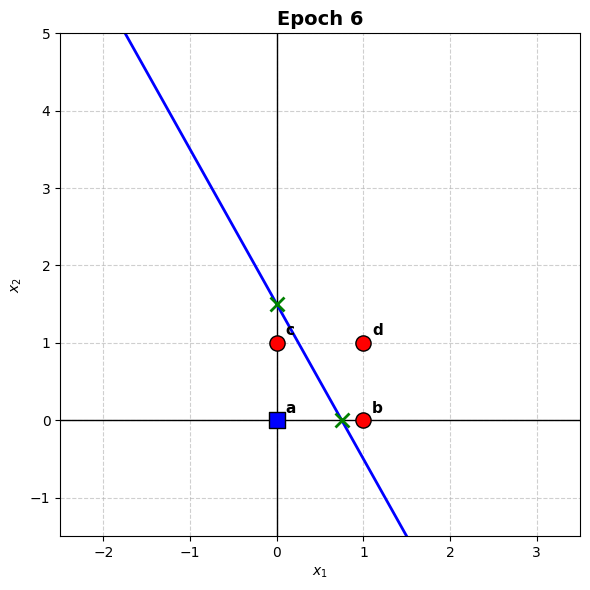

[Epoch 7] Update 6 완료 후 상태


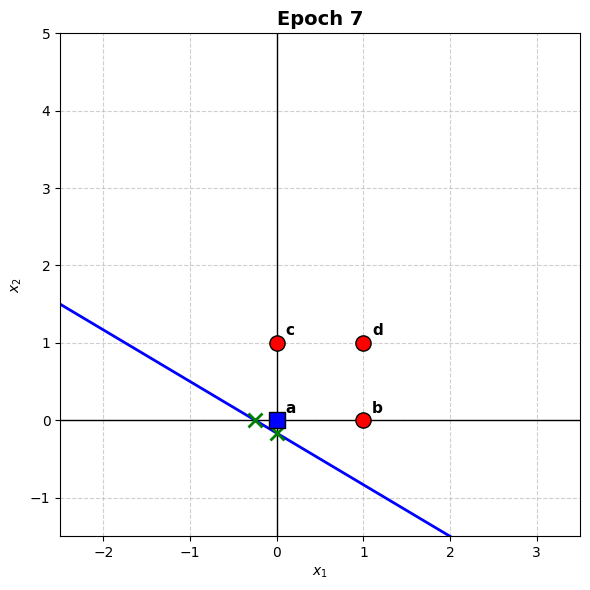

[Epoch 8] 학습 종료! (Total Updates: 7)


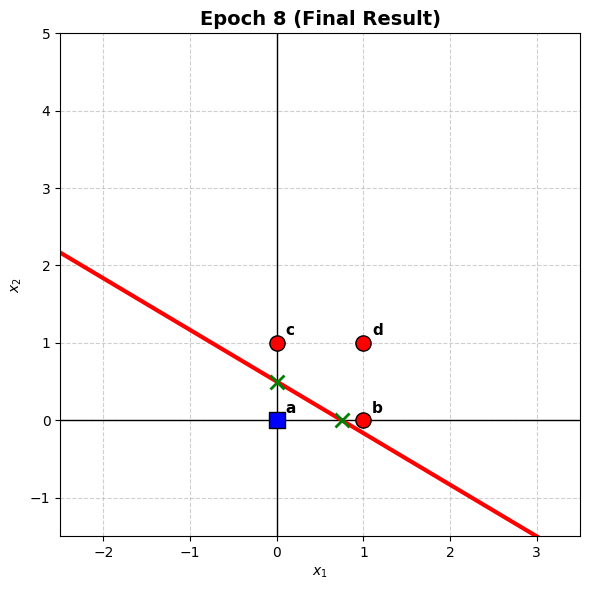


[최종 요약] 전체 학습 과정 통합 그래프


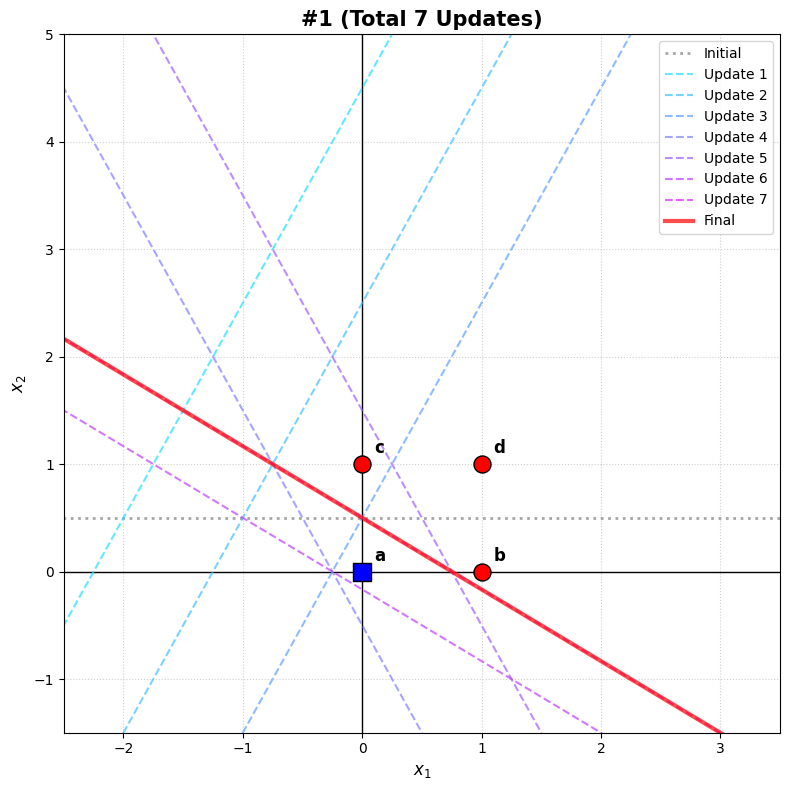

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 초기값 설정
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([-1, 1, 1, 1])
names = ['a', 'b', 'c', 'd']

# 문제 1번 초기값
W = np.array([0.0, -1.0])
b = 0.5
rho = 0.4

# 2. 그래프 그리기 함수
def plot_epoch(w, b, epoch_num, is_final=False):
    plt.figure(figsize=(6, 6))

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True, linestyle='--', alpha=0.6)

    #그래프 범위
    plt.xlim(-2.5, 3.5)
    plt.ylim(-1.5, 5.0)

    title_str = f"Epoch {epoch_num}"
    if is_final: title_str += " (Final Result)"

    plt.title(title_str, fontsize=14, fontweight='bold')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    # 데이터 점
    for i in range(len(X)):
        marker = 's' if T[i] == -1 else 'o'
        color = 'blue' if T[i] == -1 else 'red'
        plt.scatter(X[i, 0], X[i, 1], marker=marker, c=color, s=120, edgecolors='k', zorder=10)
        plt.text(X[i, 0]+0.1, X[i, 1]+0.1, names[i], fontsize=11, fontweight='bold')

    # 직선
    x_range = np.linspace(-3, 4, 100)
    if w[1] != 0:
        y_range = -(w[0] * x_range + b) / w[1]

        line_color = 'red' if is_final else 'blue'
        line_width = 3 if is_final else 2

        plt.plot(x_range, y_range, color=line_color, linewidth=line_width)

        # 절편
        y_int = -b / w[1]
        if -1.5 <= y_int <= 5.0: # 그래프 범위 안에 있을 때만 찍기
            plt.plot(0, y_int, marker='x', color='green', markersize=10, markeredgewidth=2)

        if w[0] != 0:
            x_int = -b / w[0]
            plt.plot(x_int, 0, marker='x', color='green', markersize=10, markeredgewidth=2)

    # w1=0, w2!=0인 경우 (수평선) - 문제 1 초기값
    if w[0] == 0 and w[1] != 0:
        plt.axhline(-b/w[1], color='blue', linewidth=2)
        plt.plot(0, -b/w[1], marker='x', color='green', markersize=10, markeredgewidth=2)

    plt.tight_layout()
    plt.show()

# 3. 통합 그래프 함수
def plot_all_in_one(history):
    plt.figure(figsize=(8, 8))

    plt.title(f"#1 (Total {history[-1]['cnt']} Updates)", fontsize=15, fontweight='bold')
    plt.xlabel("$x_1$", fontsize=12)
    plt.ylabel("$x_2$", fontsize=12)

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True, linestyle=':', alpha=0.6)

    plt.xlim(-2.5, 3.5)
    plt.ylim(-1.5, 5.0)

    # 데이터 점
    for i in range(len(X)):
        marker = 's' if T[i] == -1 else 'o'
        color = 'blue' if T[i] == -1 else 'red'
        plt.scatter(X[i, 0], X[i, 1], marker=marker, c=color, s=150, edgecolors='k', zorder=10)
        plt.text(X[i, 0]+0.1, X[i, 1]+0.1, names[i], fontsize=12, fontweight='bold')

    x_range = np.linspace(-3, 4, 100)
    colors = plt.cm.cool(np.linspace(0, 1, len(history)))

    for idx, state in enumerate(history):
        w = state['w']
        b_val = state['b']
        cnt = state['cnt']

        if w[1] != 0:
            y_range = -(w[0] * x_range + b_val) / w[1]

            if idx == 0:
                label = "Initial"
                color = 'gray'
                style = ':'
                width = 2
            elif idx == len(history) - 1:
                label = "Final"
                color = 'red'
                style = '-'
                width = 3
            else:
                label = f"Update {cnt}"
                color = colors[idx]
                style = '--'
                width = 1.5

            plt.plot(x_range, y_range, color=color, linestyle=style, linewidth=width, label=label, alpha=0.7)

        #초기값
        elif w[0] == 0 and w[1] != 0:
             plt.axhline(-b_val/w[1], color='gray', linestyle=':', linewidth=2, label="Initial")

    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()

#학습 실행
max_iter = 20
update_cnt = 0
history = []

print(f"문제 1 학습 시작 w(0)=[{W[0]}, {W[1]}], b(0)={b}, ρ={rho}")
print("=" *50)

# 초기값
history.append({'epoch': 0, 'cnt': 0, 'w': W.copy(), 'b': b})
print("[Epoch 0] Initial State")
plot_epoch(W, b, 0)

for k in range(1, max_iter + 1):
    Y_indices = []
    for i in range(len(X)):
        if (1 if np.dot(W, X[i]) + b >= 0 else -1) != T[i]:
            Y_indices.append(i)

    # 종료 조건
    if not Y_indices:
        print(f"[Epoch {k}] 학습 종료! (Total Updates: {update_cnt})")
        history.append({'epoch': k, 'cnt': update_cnt, 'w': W.copy(), 'b': b})
        plot_epoch(W, b, k, is_final=True)
        break

    # 현재 상태 그래프 출력
    print(f"[Epoch {k}] Update {update_cnt} 완료 후 상태")
    plot_epoch(W, b, k)

    sum_tx = np.zeros(2)
    sum_t = 0
    for idx in Y_indices:
        sum_tx += T[idx] * X[idx]
        sum_t += T[idx]

    W = W + rho * sum_tx
    b = b + rho * sum_t
    update_cnt += 1

    history.append({'epoch': k, 'cnt': update_cnt, 'w': W.copy(), 'b': b})

print("\n[최종 요약] 전체 학습 과정 통합 그래프")
plot_all_in_one(history)